---------------------
# Project: Marketing Campaign Analysis
**Marks:60**
--------------------

Welcome to the project on Foundations for Data Science. In this project, we aim to analyze marketing data and address some important business problems/questions.

---------------------
## Context
--------------------

Marketing Analytics broadly refers to the practice of using analytical methods and techniques to understand the effectiveness of various marketing activities and deploy data-driven decisions to optimize for ROI on conversion rates. It typically involves analyzing various metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the line) campaigns, targeting personalized offers. Typically the variables of interest are customer profile, campaign conversion rates, and costs associated with various marketing channels. These can generate valuable insights that can help an organization form better marketing strategies, optimize/innovate on delivery, and achieve overall growth. 

---------------------
## Problem Statement
--------------------
Company 'All You Need' has hired you as a Data Scientist and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be and the conversion rate is very low.
Your task is to analyze the related data, understand the problem, and identify key insights and recommendations for the CMO to potentially implement.  

The data set marketing_data.csv consists of 2,240 customers of All You Need company with data on:

- Campaign successes/failures
- Product preferences
- Channel performances
- Customer profiles based on the spending habits

-------------------
## Data Dictionary
-------------------
- ID : Unique ID of each customer
- Year_Birth : Age of the customer
- Education : Customer's level of education
- Marital_Status : Customer's marital status
- Kidhome : Number of small children in customer's household
- Teenhome : Number of teenagers in customer's household
- Income : Customer's yearly household income
- Recency : Number of days since the last purchase
- MntFishProducts : The amount spent on fish products in the last 2 years
- MntMeatProducts : The amount spent on meat products in the last 2 years
- MntFruits : The amount spent on fruits products in the last 2 years
- MntSweetProducts : Amount spent on sweet products in the last 2 years
- MntWines : The amount spent on wine products in the last 2 years
- MntGoldProds : The amount spent on gold products in the last 2 years
- NumDealsPurchases : Number of purchases made with discount
- NumCatalogPurchases : Number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases : Number of purchases made directly in stores
- NumWebPurchases : Number of purchases made through the company's website
- NumWebVisitsMonth : Number of visits to company's website in the last month
- AcceptedCmp1 : 1 if customer accepted the offer in the first campaign, 0 otherwise 
- AcceptedCmp2 : 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3 : 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4 : 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5 : 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- AcceptedCmp6 : 1 if customer accepted the offer in the last campaign, 0 otherwise 
- Complain : 1 If the customer complained in the last 2 years, 0 otherwise
- Country: Country customer belongs to

## Import libraries and overview of the dataset

In [231]:
# Library to supress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt 
%matplotlib inline 
from pandas.plotting import scatter_matrix
import seaborn as sns 
sns.set_style('darkgrid')

# Libraries for linear regression models
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [232]:
# from google.colab import files
# uploaded = files.upload()

### Load the dataset

In [233]:
# load the datset
df = pd.read_csv('Marketing data.csv')

# copy data to another variable to avoid any changes to original data
data = df.copy()

### View the first dataset rows 

In [234]:
# look at head (5 observations)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP


**Observations**
* The dataset has 27 columns for a single customer
* The five customers' birth year ranges from 32-63 
* 'Education does not specify the hierarchy of 'Graduation'(i.e. High School, Bachelor's, Master's, Ph.D.)
* No Income data exists to represent alimony for 'Divorced' customers. 
* Some customers make significantly less income per year.
* There are more customers with children in the home. 
* Most customers do not have teens at home. 
* All customers have purchased within the last day.
* Single customers represent a disparate budget spent on wines in the last two years.
* Divorced customers spent significantly more money on fruit products in the last two years. 
* Together and Single customers visited the store's website more frequently per month than the average customer. 
* Together and Single customers had fewer purchases in the last two years than the average customer.  
* Together and Married (Partnership) customers from the United States and Australia did not accept any offers in any campaign(s). 
* More customers accepted an offer on the second campaign than for consecutive campaign(s). 
* No customers accepted any offers in the third, fourth, fifth campaign(s). 
* There were no customer complaints in the last two years. 
* All five customers are from different countries.

### Check dataset info

In [235]:
# check the data info
df.info()

# check the shape of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

(2240, 27)

**Observations:**
- There are a total of 27 columns and 2,240 observations in the dataset.
- The Income column has less than 2,240 non-null values (i.e. Income column has missing values). 
- Hypothetically customers are not required to provide their income data.
- 'Country' should be a categorical variable.

### Summarize the dataset

In [236]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Observations:**
- The 'mean' and the second quantile should be similar in value for a normal distribution.
- There are on average more kids and teens in the home for all customer data. 
- For 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds' categories: 
- on average, some customers bought significantly more of the product than others. There is a large skew.
- On average, very few customers made purchases with a deal.
- On average, customers purchased products through a catalog slightly more than they did in-store and through the website (skew point). 
- Customers bought products in-store and on the store website fairly on average across all customers.
- Customers accepted campaigns: campaign 3 and campaign 5 more frequently than the other campaigns. 
- By the AcceptedCmp6 campaign, customers interaction significantly dropped. 
- Complaints among customers are rare. 

### Check the percentage of missing values for the Income column.

In [237]:
# % null values in the Income column
(df.isnull().sum()/df.shape[0]*100)['Income']

# fill null values using fillna()
df['Income'].fillna(0,inplace = True)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


**Observations:**
- Income has ~1.07% missing values.
- Those customers with the highest education degree (Ph.D.) are not the highest-earning customers. 
- Divorced and single customers appear to purchase more wine. 
- Divorced customers bought a lot more fruit. 
- Campaign 2 was the most accepted campaign among all customers. 

### Create a list for numerical columns in the dataset and check the summary statistics 

### **Question 1: Find the summary statistics for numerical columns and write your observations. (use describe function).** - 4 Marks

In [238]:
# numerical_cols contain numerical varibales 
numerical_cols=['Year_Birth','Income','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Kidhome',
       'Teenhome']

In [239]:
# print descriptive statistics of numerical columns
df[numerical_cols].describe(include=[np.number])

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Kidhome,Teenhome
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,51687.459375,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.444196,0.506250
std,11.984069,25609.342730,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.538398,0.544538
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,34722.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,1970.000000,51075.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,1977.000000,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.000000,1.000000
max,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,2.000000,2.000000


**Observations**
- The average customer 'Income' is similar to the dataset second quantile.
- MntWines represents a spending surge from the first quantile to the fourth quantile.
- Average fruit and sweets purchases are significantly more than the second quantile.
- Average meat purchases represent a spending surge from the first quantile to the fourth quantile.
- Customers spent relatively average on fish and gold, but customers who spent more on these items spent significantly more. 
- Perhaps all customers should be split into two groups: average spenders and high spenders. 

### Create a list for categorical columns in the dataset and check the count of each category

In [240]:
# cat_cols contain categorical variables
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country']
cat_cols

['Education',
 'Marital_Status',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp6',
 'Complain',
 'Country']

In [241]:
# print the count of each unique value in each column
for column in cat_cols:
    print(df[column].value_counts(normalize=True))
    print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.850893
1    0.149107
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp6

**Observations:**
- In 'Education', 2n cycle and Master means the same thing. Combine both categories. 
- There are many categories in marital status. Combine the categories. 
- It is unclear what 'Absurd', and 'YOLO' represent. Combine these categories to make a new category - 'Others'.
- There are only 21 customers who complained in the last two years.
- The majority of the customers belong to Spain and the least to Mexico.
- The most common educational status is Graduation and does not denote the level of graduation (i.e. High School or Bachelors's). 
- The most common marital status is Married.

## Data Preprocessing and Exploratory Data Analysis

In this section, we will first prepare our dataset for analysis.
- Fixing the categories
- Creating new columns as the total amount spent, total purchase made, total kids at home, and total accepted campaigns
- Dealing with missing values and outliers
- Extract key insights from the data

### Replace the "2n Cycle" category with "Master" in Education and "YOLO", "Alone", and "Absurd" categories with "Single" in Marital_Status

In [242]:
# replace 2n Cycle with Master
df['Education_Mod'] = df["Education"].replace("2n Cycle", "Master")

In [243]:
# replace 'YOLO', 'Absurd'  with 'Others'
# replace 'Alone' with 'Single'
# replace 'Married', 'Together' with 'Partnership'
# replace 'Single', 'Divorced', 'Widow' with 'No Partnership'
df['Marital_Status_Mod'] = df['Marital_Status'].replace(["Absurd", "YOLO"], "Others").replace(["Alone",], "Single").replace(["Married", "Together"], "Partnership").replace(["Single", "Divorced", "Widow"],"NonPartnership")

Evaluate the distribution count in different categories for marital status.

In [244]:
df.Marital_Status_Mod.value_counts()

Partnership       1444
NonPartnership     792
Others               4
Name: Marital_Status_Mod, dtype: int64

**Observation**:

- The majority of customers belong to the 'Married' category and the 'Other' category has only 4 observations. 
- 'Married' and 'Together' could be consolidated into a category called 'Partnership'.
-  Customers in a partnership comprise the biggest customer group(s).
- 'Single', 'Divorced', 'Widow', could be consolidated into a category called 'NonPartnership'.
-  Customers in a non-partnership are the second biggest customer group(s).
- 'Others' is a singular category and could be dropped since it has so few customers to gauge metrics. 

### Creating new features from the existing features

In [245]:
# create new features to get overall picture of a customer, how much he/she has spend, 
#how many children he/she has, total campaigns accepted, etc.


# total spending by a customer in the last 2 years 
spending_col = [col for col in df.columns if 'Mnt' in col]
df['Total_Spending'] = df[spending_col].sum(axis = 1) 

# total purchases made by a customer 
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchase'] = df[platform_col].sum(axis = 1) 

# total no. of childern
df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']  

# total no. of campaign accepted by a customer
campaigns_cols = [col for col in df.columns if 'Cmp' in col]
df['TotalCampaignsAcc'] = df[campaigns_cols].sum(axis=1)

# total no. of spending for customers in 'Partnership'
partnership_spending_sum = df.loc[df['Marital_Status_Mod'] == 'Partnership', 'Total_Spending'].sum()
print("Total Spending for Partnerships", partnership_spending_sum)

# total no. spending for customers in 'NonPartnership'
nonpartnership_spending_sum = df.loc[df['Marital_Status_Mod'] != 'Partnership', 'Total_Spending'].sum()
print("Total Spending for NonPartnerships", nonpartnership_spending_sum)

# total no. campaigns accepted for customers in 'Partnership'
partnership_campaigns_sum = df.loc[df['Marital_Status_Mod'] == 'Partnership', 'TotalCampaignsAcc'].sum()
print("Total campaigns accepted for Partnerships", partnership_campaigns_sum)

# total no. campaigns accepted for customers in 'NonPartnerships'
nonpartnership_campaigns_sum = df.loc[df['Marital_Status_Mod'] == 'NonPartnership', 'TotalCampaignsAcc'].sum()
print("Total campaigns accepted for NonPartnerships", nonpartnership_campaigns_sum)

df.head(80)

Total Spending for Partnerships 863318
Total Spending for NonPartnerships 493670
Total campaigns accepted for Partnerships 588
Total campaigns accepted for NonPartnerships 409


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp6,Complain,Country,Education_Mod,Marital_Status_Mod,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,0,SP,Graduation,NonPartnership,1190,15,0,1
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,1,0,CA,Graduation,NonPartnership,577,18,0,2
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,US,Graduation,Partnership,251,11,1,0
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,AUS,Graduation,Partnership,11,4,2,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,0,0,SP,Graduation,NonPartnership,91,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,9999,1965,Graduation,Together,75276.0,0,0,2,610,105,...,0,0,0,SP,Graduation,Partnership,1040,23,0,0
76,10352,1963,Graduation,Widow,34213.0,1,1,2,50,4,...,0,0,0,SA,Graduation,NonPartnership,117,9,2,1
77,7919,1976,PhD,Together,72335.0,0,0,2,1285,105,...,0,0,0,SP,PhD,Partnership,2092,23,0,1
78,4114,1964,Master,Married,79143.0,0,0,2,650,37,...,0,0,0,AUS,Master,Partnership,1693,29,0,0


**Observation**:

- Total Spending for Married and Together (Partnership) customers is 863318.
- Total Spending for Other, Single, Divorced, Widow customers (NonPartnership) is 493670.
- Customers in a partnership spend more than customers that are not in a partnership.
- Customers that are Single, Divorced, Widowed, or Other (NonPartnership) accepted campaigns less frequently. 
- Married and Together (Partnership) customers accepted campaigns more frequently.  
- Ph.D. educated customers spent the most money on all products. 
- Customers in partnerships accepted campaigns more frequently than customers who are not in partnerships. 

### Check outliers for new variables - Total_Spending, Total_Purchase. Also, let's analyze the Year_Birth column as we observed above that it had a minimum value of 1893.

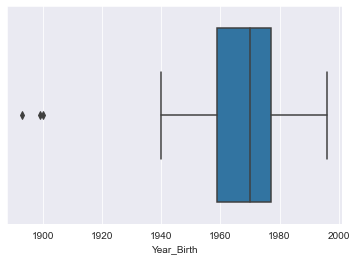

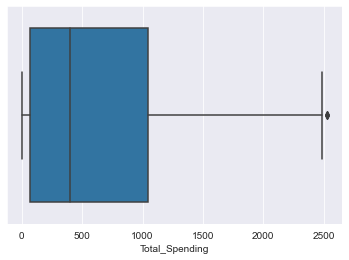

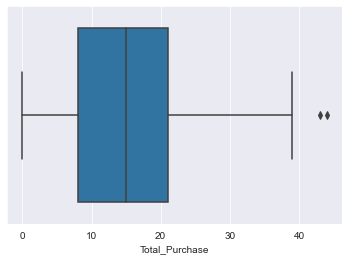

In [246]:
# plot boxplot for Year_Birth, Total_Spending, Total_Purchase
cols=['Year_Birth','Total_Spending','Total_Purchase']
for i in cols:
    sns.boxplot(x=df[i])
    plt.show()

**Observations:**
- The birth year is reported as <=1900 for some users, while the current year is 2021. It's unlikely that the person is alive. it may be a reporting error.
- There are some outliers in total spending and total purchase. 
- The observations marked as outliers are close to the upper whisker and some extreme points can be expected for variables like total spending. We can leave these outliers untreated. 

Let's check the number of observations for which year birth is less than 1900. 

In [247]:
df[df['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp6,Complain,Country,Education_Mod,Marital_Status_Mod,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
513,11004,1893,2n Cycle,Single,60182.0,0,1,23,8,0,...,0,0,0,SA,Master,NonPartnership,22,4,1,0
827,1150,1899,PhD,Together,83532.0,0,0,36,755,144,...,0,0,0,SP,PhD,Partnership,1853,15,0,1


**Observation**:
- There are only 2 observations for which birth year is less than 1900. Drop these observations.

In [248]:
# keep data for customers having birth year >1900
df = df[df['Year_Birth'] > 1900]

### Check the outliers and impute the missing values for the Income variable

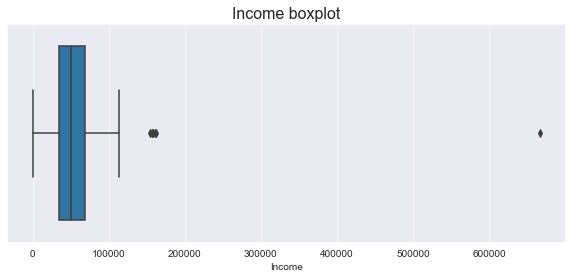

In [249]:
#plotting Boxplot for income
plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()

**Observations:**

- We can see from the boxplot that there are some outliers in the income variable.
- Let's find the value at upper whisker to check how many observations are marked as outliers.


In [250]:
# calculate the upper whisker for the Income variable
Q1 = df.quantile(q=0.25) #First quantile
Q3 = df.quantile(q=0.75) #Third quantile
IQR = Q3 - Q1            #Inter quantile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
print(upper_whisker)

118646.5


In [251]:
# check the observations marked as outliers
df[df.Income>upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp6,Complain,Country,Education_Mod,Marital_Status_Mod,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc
325,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,0,0,0,SA,Graduation,Partnership,1730,28,0,0
497,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,0,0,0,US,PhD,Partnership,1717,44,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,0,SA,Graduation,Partnership,62,11,1,0
731,1503,1976,PhD,Together,162397.0,1,1,31,85,1,...,0,0,0,SP,PhD,Partnership,107,1,2,0
853,5336,1971,Master,Together,157733.0,1,0,37,39,1,...,0,0,0,SP,Master,Partnership,59,2,1,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,81,1,1,...,0,0,0,SP,Graduation,NonPartnership,6,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,CA,PhD,Partnership,8,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,0,0,0,IND,PhD,Partnership,1608,37,1,0


**Observations**:

- We have only 8 observations with an income greater than the upper whisker. 
- Only 3 observations (ID- 4931, 1501, 8475) out of 8 outliers have purchased more than 11 times in the last 2 years.
- Other 5 observations have very less amount of total spending.

**Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.**

In [252]:
# check the summary statistics for observations marked as outliers
df[df.Income>upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0


**Observations:**

- The outliers' average 'Income' (221604.500) is much higher than its second quantile (157488.0). 
- For an even distribution we should see an average similar to that of the second quantile.
- Meat products are extreme with an average (621.875) and the second quantile (17.0). 

In [253]:
#Checking the summary statistics for observations not marked as outliers
df[df.Income<upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2229.0,5589.296097,3244.840538,0.0,2829.0,5455.0,8420.0,11191.0
Year_Birth,2229.0,1968.888739,11.707430,1940.0,1959.0,1970.0,1977.0,1996.0
Income,2229.0,51066.271422,21279.240126,0.0,34600.0,50943.0,68118.0,113734.0
Kidhome,2229.0,0.444594,0.538636,0.0,0.0,0.0,1.0,2.0
Teenhome,2229.0,0.507402,0.544735,0.0,0.0,0.0,1.0,2.0
Recency,2229.0,49.106326,28.946476,0.0,24.0,49.0,74.0,99.0
MntWines,2229.0,304.991476,336.761943,0.0,24.0,176.0,505.0,1493.0
MntFruits,2229.0,26.348587,39.764060,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2229.0,165.283984,219.336589,0.0,16.0,67.0,231.0,1725.0
MntFishProducts,2229.0,37.642441,54.700548,0.0,3.0,12.0,50.0,259.0


**Observations**:

- None of the outliers have accepted any of the campaigns or have submitted any complaints in the last 2 years.
- Customers who are outliers have lower mean expenditure per customer for all the products except meat products.
- The outliers have a higher number of catalog purchases on average and a very low number of web purchases.
- We can drop the 5 observations at indices [527, 731, 853, 1826, 1925] as they would not add value to our analysis.

In [254]:
#Dropping 5 observations at indices 527, 731, 853, 1826, 1925
df.drop(index=[527, 731, 853, 1826, 1925], inplace=True)

### Correlation of Purchases with website visits.

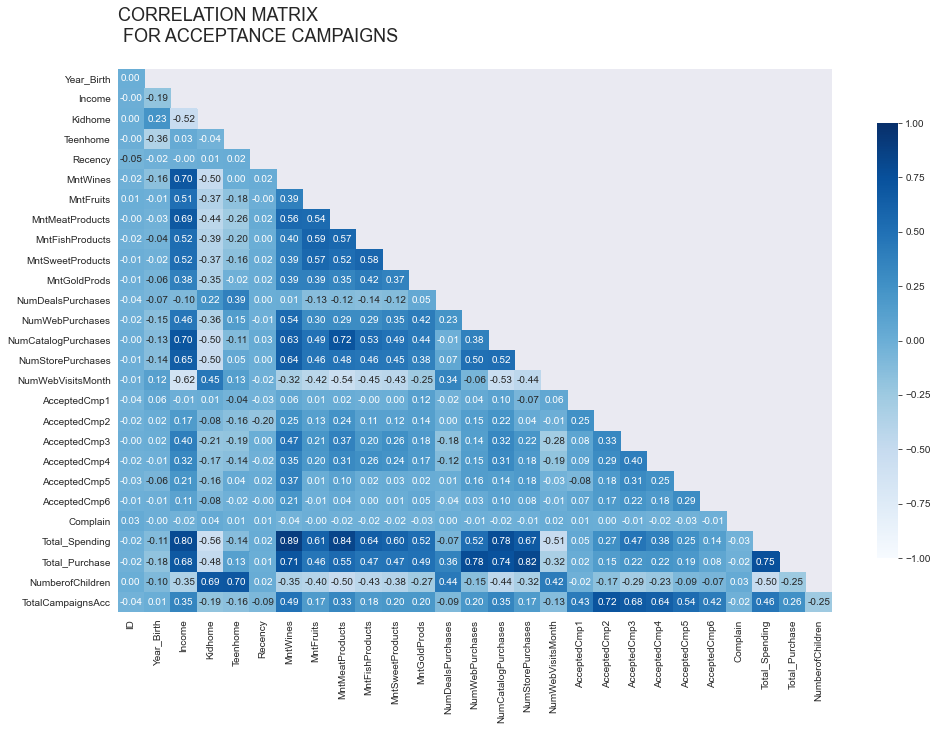

In [255]:
# get correlations 
df_corr = df.corr()

# figure
fig, ax = plt.subplots(figsize=(16, 10))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})

# ticks
# yticks
plt.yticks(rotation=0)

# title
title = 'CORRELATION MATRIX\n FOR ACCEPTANCE CAMPAIGNS \n'
plt.title(title, loc='left', fontsize=18)

plt.show()

**Observations:**

- Total spending and Total Purchases are positively correlated with income.
- As customers get older, their income increases. This is expected.
- In the data, customers who report more children, have a lower income. 
- The data is missing a demographic: customers who report more children, but have higher incomes. 
- Controlling for income, could data illustrate that higher-income customers who report having more kids, would spend more overall on products at the store?
- Older customers with teens in the home, have more income.
- Customers with income spend more on catalog and in-store purchases. 
- Number of visits per month is positively correlated with having more kids in the home. 
- Customers tend to buy more meat when they see meat products in a catalog. 
- Customers with teens in the home experienced a negative correlation with accepting campaign 1. 
- With campaign 1, customers did not have any in-store purchases. 
- With campaign 3 and campaign 4, customers did not use the store website as frequently.
- Campaign 2 saw a high campaign acceptance rate. 

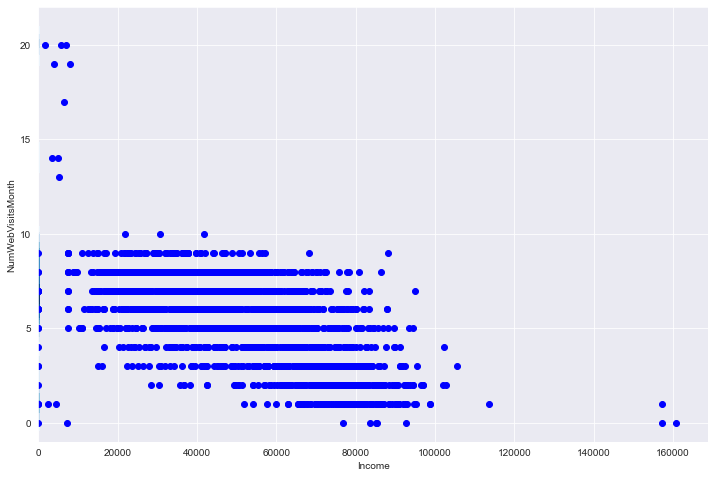

In [256]:
# scatter plot
fig, ax = plt.subplots(1, figsize=(12,8))
sns.kdeplot(df.Income, df.NumWebVisitsMonth, cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(df.Income, df.NumWebVisitsMonth, color='blue')

**Observations:**

- As customer income increases, customer web visits per month drop significantly.
- Possible that campaigns are not reaching higher income customers? 
- Campaigns should be reaching higher income customers because their spending/purchases are positively correlated with their income. 

### Linear regression model for TotalCampaignsAcc and feature columns

In [257]:
# visualize the relationship between the features and the response using scatterplots

# create X and y
feature_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
X = df[feature_cols]
Y = df.TotalCampaignsAcc

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, Y)

# pair feature names with coefficients
sorted(list(zip(feature_cols, lm1.coef_)), key=lambda x:x[1])


[('Teenhome', -0.26593176770009563),
 ('MntFruits', -0.0014055439600981151),
 ('MntFishProducts', -0.0012016821982217428),
 ('Income', 2.859036450235253e-06),
 ('MntSweetProducts', 0.00017755309786602258),
 ('MntMeatProducts', 0.00021023409028208517),
 ('MntGoldProds', 0.0007461799777860164),
 ('MntWines', 0.0012652584700998703),
 ('Year_Birth', 0.00202150454781746),
 ('Kidhome', 0.09547823888545176)]

**Observations:**

- Teen at home is a major factor in campaign acceptance. All other features combined do not affect the linear model as much as the 'Teenhome' factor. 
- Customers with teens at home are highly unlikely to accept a campaign.
- Whereas, customers with kids at home, see a positive correlation with campaign acceptance.
- The customer's birth year does affect campaign acceptance rates. 
- Income has almost no correlation with campaign acceptance.
- For fruit and fish products, customers also experienced a negative correlation with the total acceptance rate and were unlikely to accept campaigns. 
- Meat, gold, and wine products saw a positive, but minor correlation with customers' total acceptance rates for campaigns.  

### Check the distribution for Income

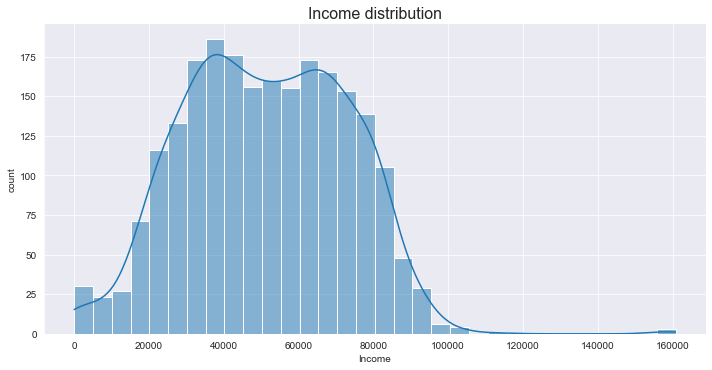

In [258]:
# plot displot for income
sns.displot(df['Income'], kde=True, height=5, aspect=2)
plt.title('Income distribution', size=16, )
plt.ylabel('count');

**Observations:**

- After treating outliers, the distribution for the income variable is close to normal distribution with very few extreme observations to the right.
- We will replace the missing values for the income variable with the median, and not mean, as the variable is slightly skewed to the right

In [259]:
# fill null values with median
df['Income'].fillna(df.Income.median(), inplace=True)

### Analyzing all the campaigns

### **Question 2: Write your observations on acceptance rate for each campaign given in the below plot.** - 4 Marks

#### Let's find out what is the acceptance rate for each campaign?

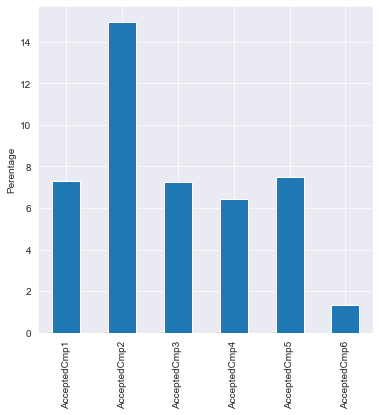

In [260]:
# Plot the % acceptance for every campaign
Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

success_campaign=(df[Camp_cols].sum()/df.shape[0])*100

# plot
success_campaign.plot(kind='bar', figsize=(6,6))
plt.ylabel("Perentage")
plt.show()

**Observations**
- Campaign2 received the highest interest.
- Oddly, Campaign 5 received the next highest interest.
- There is a definite disinterest in Campaign 6.

### Let's analyze what kind of customer are accepting campaigns?

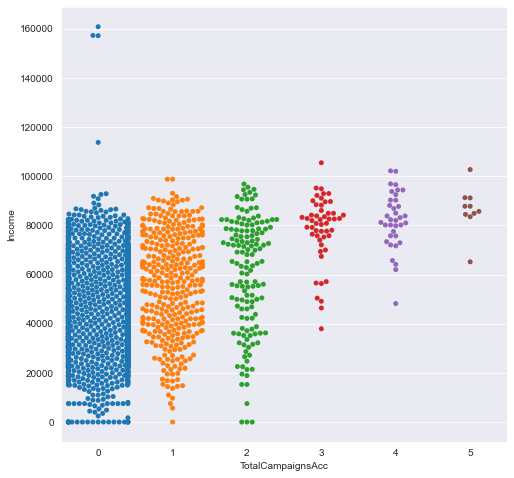

In [198]:
# swarmplot the customers that are accepting campaigns
plt.figure(figsize=(8,8))
sns.swarmplot(x='TotalCampaignsAcc', y='Income', data=df)
plt.show()

**Observations:**
- Customers making at least 80K have a steady acceptance across all campaigns.
- The higher the income higher the number of campaigns accepted.
- However, there is diminishing returns on income and acceptance rates: 
- over ~90000 salary, the customers' acceptance rate drops significantly.
- Acceptance rate for customers that make less than ~18000 also sees significant drops. 
- Between 20,000 - 80,000 income, customers have tremendous acceptance for campaigns 0-1. 
- With additional campaigns to accept, customers' acceptance drops decelerate with each new campaign to accept.
- Customers who made over 120000 did not accept any campaigns after the first campaign.

In [199]:
# show the mean income of customers
df.Income.mean()

51210.533602150535

**Observations:**
- The average income per customer is $51210.53

### **Question 3: Write your observations on acceptance rate for each campaign according to the income level.** - 7 Marks

The mean income of customers is close to 52K. Let's divide the income into 2 segments of income>52k and income<52k and see the acceptance rate in each segment.

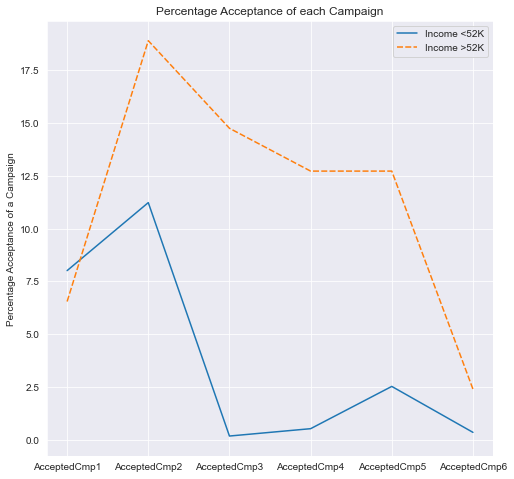

In [200]:
# make dataframes of customers having income <52k and >52K
df1=df[df.Income<52000]
df2=df[df.Income>52000]

Camp_cols=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

# calculate success rate of each campaign for both segments 
success_campaign1=pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0])*100, columns=['Income <52K'])

success_campaign2=pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0])*100, columns=['Income >52K'])

new_df=pd.concat([success_campaign1, success_campaign2], axis=1)

# plot
plt.figure(figsize=(8,8))
sns.lineplot(data=new_df)
plt.title("Percentage Acceptance of each Campaign")
plt.ylabel("Percentage Acceptance of a Campaign")
plt.show()

**Observations**:

- For Campaign 3 and Campaign 4, performance relative to an average of all the acceptance rate(s) was below for the lower income group and above for the higher income group. 
- For lower-income customers, Campaign 3 received the least interest. 
- For lower-income customers, the acceptance rate drastically dropped after Campaign 2.
- For higher-income customers, Campaign 2 received the highest interest.
- For higher-income customers, the customer acceptance rate drastically dropped after Campaign 5.
- For lower-income customers, Campaign 3 and Campaign 4 were extremely off of the average for acceptance rates. 

Let's find out who has accepted the last campaign and what could be the reason?

In [201]:
df[df['AcceptedCmp6']==1].shape

(30, 33)

- There are only 30 customers who have accepted the last campaign.
- Let's check if these customers are new or they have accepted previous campaigns as well.

In [202]:
grouped2=df.groupby('AcceptedCmp6').mean()['TotalCampaignsAcc']
grouped2

AcceptedCmp6
0    0.404632
1    3.633333
Name: TotalCampaignsAcc, dtype: float64

**Observations:**
- We know that the maximum number of campaigns any customer has accepted is 5.
- We can observe that the value for TotalCampaignsAcc is ~3.6 for customers who have accepted the last campaign.
- This implies that these 30 customers are those loyal customers who have been accepting most of the campaigns.

### It could be that different campaigns are focussed on different set of products. Let's check if the product preference for those who accepted the campaigns is different from those who didn't - using amount spent and number of purchases

Let's define a function which will take the column name for the product as input and will generate the barplot for every campaign and average amount spent on a product

In [203]:
# bar plot for every campaign and average amount spent on a product
def amount_per_campaign(columns_name):
    p1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    p2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    p3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    p4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    p5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    p6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([p1,p2,p3,p4,p5,p6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average amount spent on' + ' ' + columns_name)
    plt.show()

#### Use the function defined above to generate plots for different purchasing Products

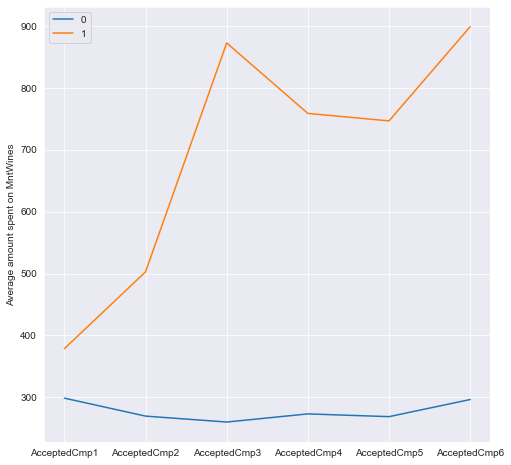

In [204]:
#function on the column MntWines
amount_per_campaign('MntWines')


**Observations:**
- For those customers accepting a campaign, had a high average amount for wine during campaigns 3, 4, 5, and 6.
- Customers not accepting campaigns were not affected by wine products. 
- Customers not accepting campaigns saw a decrease in wine purchase from campaigns 1 to 2 and a steady increase in wine purchase from campaigns 3,4,5. 

### **Question 4: Write the code and your observations on average amount spent on different products across all campaigns.** - 7 Marks

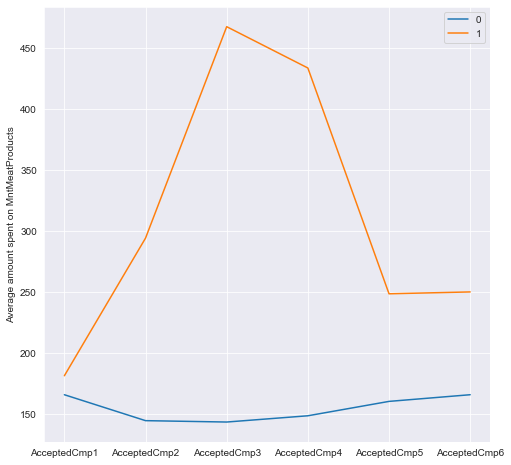

In [205]:
#meat products

#call the function amount_per_campaign for MntMeatProducts
amount_per_campaign('MntMeatProducts')

**Observations:**
- Customers who accepted a campaign, spent a great deal on meat products in campaign 1, campaign 2, and campaign 3.
- There is a slight decrease in meat product purchases at campaign 3 for those accepting campaigns. 
- There is a monumental decrease in meat product purchases after campaign 4 for customers who accepted at least one campaign. 
- Customers who did not accept campaigns, were evenly affected by campaigns 2,3,4,5, and 6 for meat product purchases. 
- Customers who did not accept campaigns, saw a decline in meat purchases after campaign 1. 
- Both types of customers experienced a plateau in meat purchases after campaign 5. 

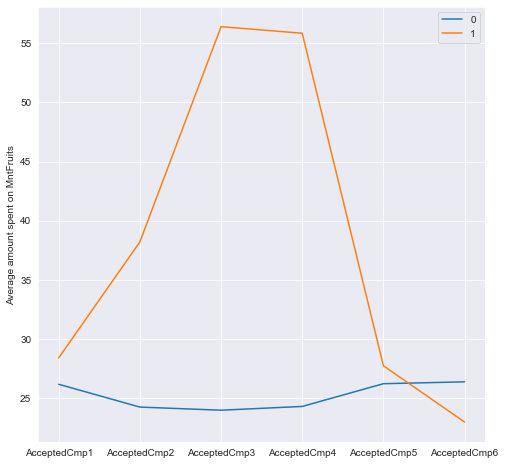

In [206]:
# Fruit products

#call the function amount_per_campaign for MntFruits
amount_per_campaign('MntFruits')


**Observations:**
- Customers accepting campaigns spent more money on fruit on campaign 2 and campaign 3. 
- Customers accepting campaigns plateaued their spending for fruit products between campaign 3 and campaign 4. 
- Customers accepting campaigns significantly decreased fruit product purchases from campaign 4 to campaign 5.
- Customers not accepting campaigns spent more on fruit products at the beginning of campaign 1 and saw a fruit purchase decline going into campaign 2. 
- Between campaign 2 and campaign 3, customers not accepting campaigns spent about the same on fruit. 
- Campaign 5 saw an increase in fruit purchases for those customers not accepting campaigns. 
- While there was a negative correlation between campaign 5 and fruit spending for customers who accepted campaigns, campaign 5 did not see any drastic changes in fruit spending for customers not accepting campaigns. 
- While campaign 2 saw a positive increase in fruit spending for customers accepting campaigns, campaign 2 saw a negative decrease in fruit spending for customers not accepting campaigns. 
- Campaign 5 saw a positive increase in fruit spending for customers not accepting campaigns, while, campaign 5 saw a massively negative decline in fruit spending for customers accepting campaigns. 

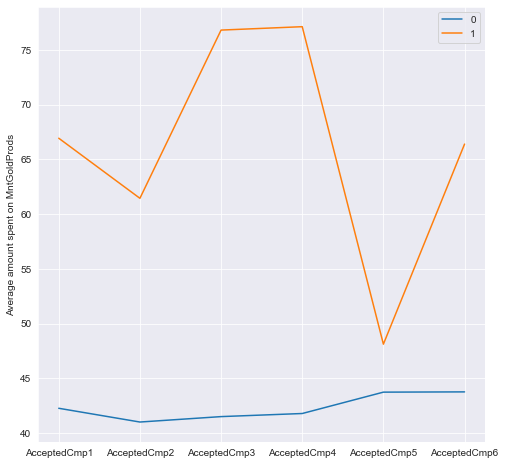

In [207]:
# gold products

#call the function amount_per_campaign for MntGoldProds
amount_per_campaign('MntGoldProds')


**Observations:**
- For customers not accepting campaigns, campaign 1 negatively correlated with average amount spent on gold products.
- For customers accepting campaigns, campaign 1 was also negatively correlated with average amount spent on gold products. 
- For both types of customers, there was an increase in gold purchased during the campaign 2; however, customers not accepting campaigns, were less affected by the campaign whereas, customers accepting campaigns spent a great deal more on gold products after campaign 2. 
- For campaign 3 and campaign 4, there was a similar spending plateau for both type of customer. 
- Where gold spending drastically declined after campaign 4 for customers accepting campaigns, gold purchases increased for customers not accepting campaigns. 
- Campaign 5 was the least received for customers accepting campaigns and the highest received for customers not accepting campaigns. 
- Gold spending significantly increased for customers accepting campaigns during the campaign 6. 

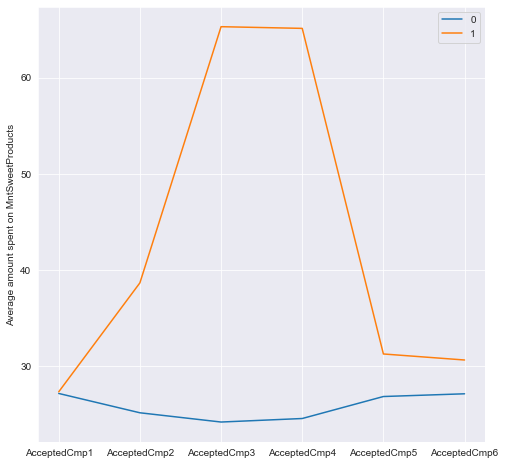

In [208]:
#sweet products

#call the function amount_per_campaign for MntSweetProducts
amount_per_campaign('MntSweetProducts')

**Observations**
- Both types of customers had a positive reception for campaign 1 and in the purchase of sweet products. 
- However, for customers accepting campaigns, spending increased through campaign 2 and campaign 3 on sweet products. 
- Whereas, customers not accepting campaigns saw a decline in sweets spending during the campaign 2. 
- Campaign 3 saw a plateau in spending for both types of customers. 
- Campaign 5 saw a massive decrease in sweets purchases for customers accepting campaigns, and an increase in sweets purchases for customers not accepting campaigns.
- Campaign 6 was noneffective. 

### We have analyzed the relationship between campaigns and different products. Now, let's see the relationship of campaigns with different purchasing channels.

We have a defined a function which will take the column name of the channel name as input and will generate the barplot for every campaign and average purchase made through that channel if the campaign is accepted

In [209]:
def Purchases_per_campaign(columns_name):
    dp1=pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    dp2=pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    dp3=pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    dp4=pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    dp5=pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    dp6=pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    pd.concat([dp1,dp2,dp3,dp4,dp5,dp6],axis=0).set_index([Camp_cols]).plot(kind='line', figsize=(8,8))
    plt.ylabel('Average' + ' ' + columns_name)
    plt.show()

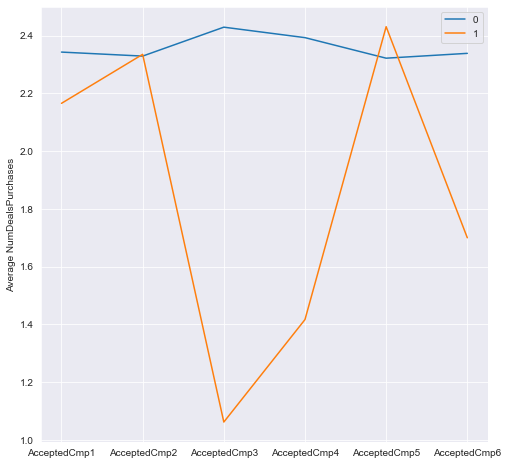

In [210]:
#here is an example showing how to use this function on the column NumDealsPurchases
Purchases_per_campaign('NumDealsPurchases')

**Observations:**
- For the customers accepting campaign 3, 4, and 6 the average deals purchase is quite low.
- During campaign 5, customer acceptance was high.
- Campaign 2 received an equal acceptance rate for both customer types.
- Customers accepting campaign 3 saw a surge in acceptance from campaign 3, campaign 4 and all the way up to campaign 5. 
- Customers accpeting campaigns, drastically declined acceptance during campaign 6.   

### **Question 5: Write the code and your observations on average number of purchases from different channels across all campaigns.** - 7 Marks

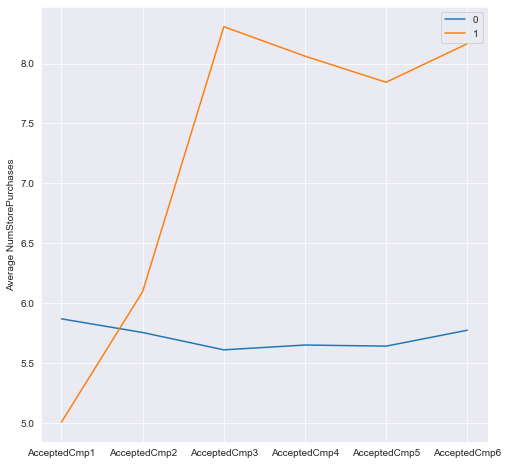

In [211]:
# store purchase

#call the function Purchases_per_campaign for NumStorePurchases
Purchases_per_campaign('NumStorePurchases')

**Observations:
- For customers accepting campaigns, the average number of store purchases drastically increases from campaign 1 until campaign 3. 
- At campaign 3, customers accepting campaigns, saw a decline in the average number of store purchases. 
- Customers not accepting campaigns, received a higher average of store purchases during campaign 1 and a decline until campaign 3. 

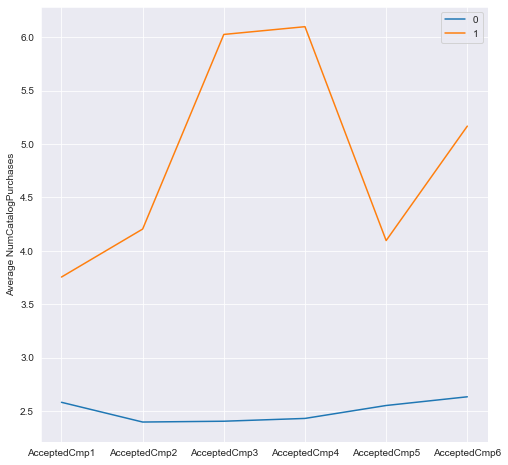

In [212]:
#Catalog purchase

#call the function Purchases_per_campaign for NumCatalogPurchases
Purchases_per_campaign('NumCatalogPurchases')

**Observations:
- For customers accepting campaigns, the number of catalog purchases has a high increase from campaign 2 to campaign 3 and from campaign 5 to campaign 6. 
- For customers accepting campaigns, catalog purchases decreased significantly from campaign 4 to campaign 5. 
- For those customers not accepting campaigns, the average purchase from catalogs is relatively small through all of the campaigns. 

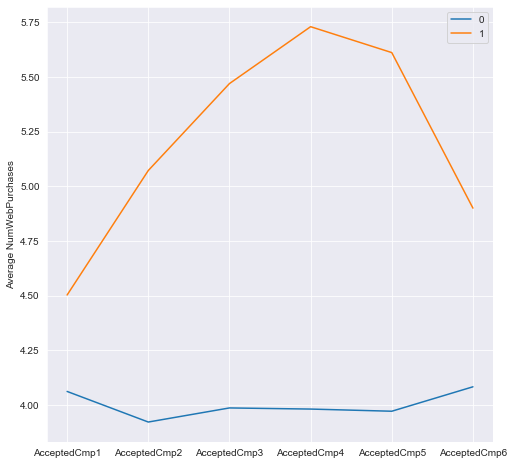

In [213]:
#Web purchases

#call the function Purchases_per_campaign for NumWebPurchases
Purchases_per_campaign('NumWebPurchases')

**Observations:
- Web purchases remain relatively low for customers that do not accept campaigns. 
- Web purchases drastically increase during campaigns 1 to 4 for customers accepting campaigns. 
- Customers who accept campaigns, saw a negative decline in web purchases at campaign 6, whereas customers not accepting campaigns saw an increase in web purchases at campaign 6.  

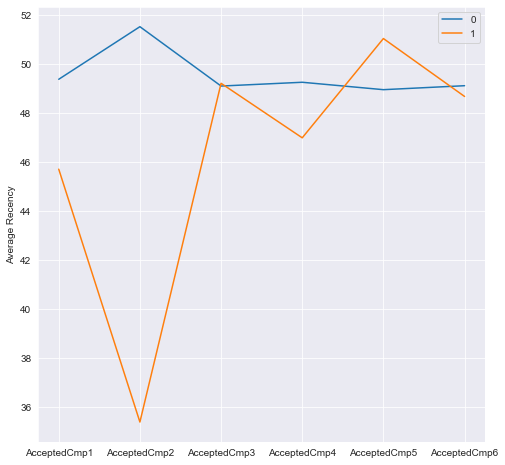

In [214]:
#Recency

Purchases_per_campaign('Recency')

**Observations:**
- Average recency of the customers who accepted campaign 2 is quite low which implies that campaign 2 was accepted by the customers who recently purchased an item. 

#### We have analyzed the relationship between campaigns and numerical variables. Let's see the relationship of campaigns with different categorical variables

We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.

In [215]:
def Cat_Campaign_Relation(df, column_name):
    e1=(df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1'])
    e2=(df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    e3=(df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    e4=(df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    e5=(df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    e6=(df.groupby([column_name]).sum()['AcceptedCmp6']/df.groupby([column_name]).count()['AcceptedCmp6'])
    df_new=pd.concat([e1,e2,e3,e4,e5,e6],axis=1).T
    plt.figure(figsize=(8,8))
    sns.lineplot(data=df_new, markers=True, linewidth=2)
    plt.ylabel('Percentage Acceptance')
    plt.show()

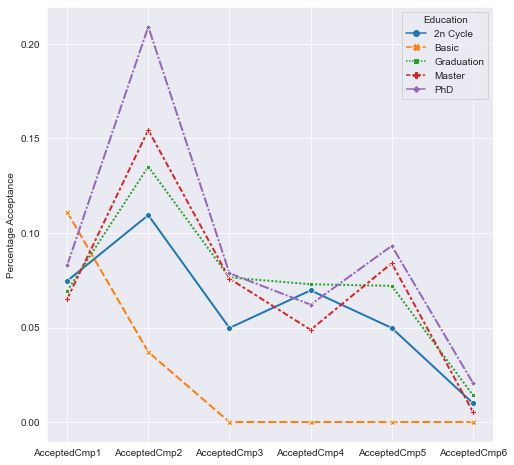

In [216]:
#here is an example showing how to use this function on the column Education
Cat_Campaign_Relation(df, 'Education')

**Observations:**

- More than 20% of the customers with Ph.D. have accepted campaign 2.
- Customers with basic education have only accepted campaigns 1 and 2.
- Except for customers with basic education levels, all education levels follow the same trend.
- Customers with basic education levels also saw very low acceptance rates across all campaigns. 
- All customers saw some significant acceptance for campaign 2 and campaign 5. 
- Customers with a master's degree had a low acceptance rate for campaign 3 and campaign 5. 
- All customers had an extremely low acceptance rate during campaign 6. 

### **Question 6: Write the code and your observations on percentage acceptance for different categorical variables across all campaigns.** - 7 Marks

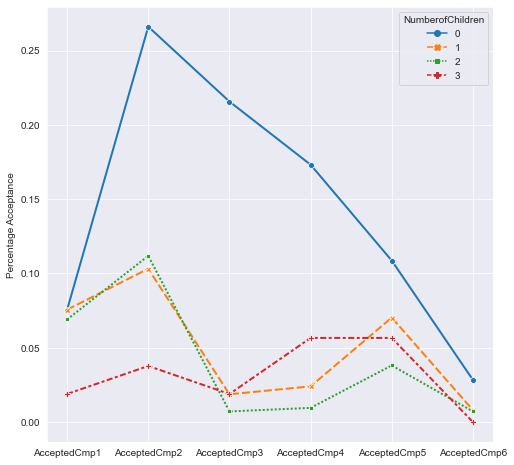

In [217]:
#NumberofChildren

#call the function Cat_Campaign_Relation for NumberofChildren
Cat_Campaign_Relation(df, 'NumberofChildren')

**Observations:**

- Customers with no children saw the highest acceptance rate for all campaigns but had the most significant drop in acceptance rate from campaign 1 to campaign 6. 
- Those customers with two children, highly accepted campaign 2, but then significantly tapered out for the remaining campaigns. 
- Interestingly, customers with 1 child were very similar in acceptance rates for campaigns 2, 3, 4, and 6 to that of customers with two children. The poignant difference between customers was campaign 5: customers with one child in the home had a higher acceptance rate for campaign 5 than customers who had two children in the home. 
- Customers with three children saw the highest acceptance rate for campaign 4. 

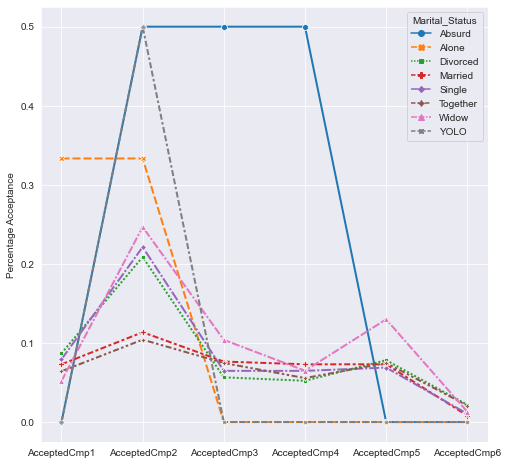

In [218]:
#Let's filter the observations with 'Others' category as they are only 4 such observations
df_rest=df[df.Marital_Status!='Others']

#call the function Cat_Campaign_Relation for Marital_Status with dataframe df_rest
Cat_Campaign_Relation(df_rest, 'Marital_Status')

**Observations:**

- 'Absurd' customers tremendously accepted campaign 1 and campaign 4, but tremendously rejected campaign 5. 
- 'Absurd' customers do not have data for acceptance rate on campaign 6, which could signify there is not enough data to depict 'Absurd' acceptance rate behavior.
- 'Alone' customers started with a high acceptance rate for campaign 1 and campaign 2 but saw a tremendous drop in acceptance for campaign 3. 
- 'Divorced', 'Single', and 'Widow' customers saw a similar acceptance rate for campaign 1, campaign 2, campaign 3, campaign 4, and campaign 6. 'Divorced', 'Single' and 'Widow' customers had a high acceptance rate for campaign 5. 
- 'Married' and 'Together' customers closely resembled acceptance behavior. However, specifically, 'Married' customers saw a plateau in acceptance rates between campaign 3 and campaign 5. 
- 'Divorced' couples accepted campaign 4 the least of all the other customers. 
- 'YOLO' customers have a high acceptance rate for campaign 2 and then dropped significantly in acceptance for campaign 3. 
- All customers experienced a fairly high acceptance rate for campaigns 2 and campaign 5. 

<AxesSubplot:ylabel='Country'>

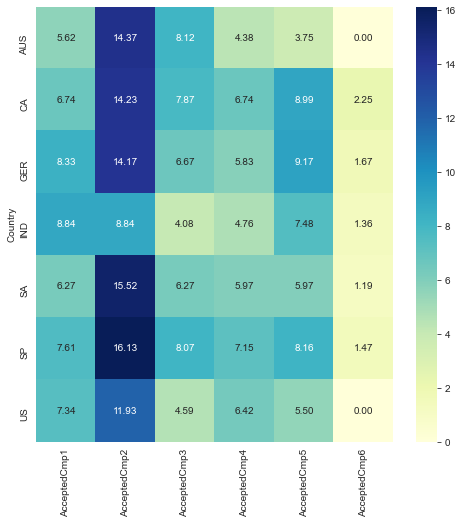

In [219]:
#Let's filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico=df[df.Country!='ME']

#Plot
plt.figure(figsize=(8,8))
sns.heatmap((df_not_mexico.groupby('Country').sum()[Camp_cols]/df_not_mexico.groupby('Country').count()[Camp_cols])*100, annot=True, fmt='0.2f', cmap="YlGnBu")

**Observation**:
- The highest positive correlation exists among all country groups and campaign 2. 
- Australia, Canada, and Germany had similar ~14% acceptance for campaign 2. 
- Saudi Arabia and Spain had similar ~15% acceptance for campaign 2. 
- The United States received the lowest of all acceptance rates for campaign 2. 
- Canada, Germany, and Spain carried out a high acceptance rate through campaign 2, campaign 3, campaign 4, and campaign 5. 
- All Countries had hardly any acceptance rate for campaign 6, except Australia had no percentage of acceptance for campaign 6. 
- Australia only had high acceptance in campaigns 2 and campaigns 3.
- Canada, Germany, Netherlands, and Spain highly accepted campaign 5. 
- Germany, Netherlands, Spain, and United States highly accepted campaign 1. 
- United States and the Netherlands, had a poor acceptance rate for campaign 3. 

### Check the product preferences by customers

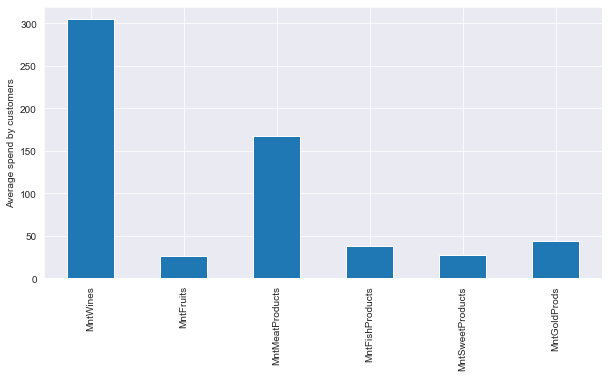

In [220]:
# create a list which contains name of all products
mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending=df[mnt_cols].mean(axis=0)
spending.plot(kind='bar', figsize=(10,5))
plt.ylabel("Average spend by customers")
plt.show()

**Observations**:

- The average amount spent by customers in the last 2 years is highest for wines followed by meat products.
- Average amount spent on fruit was the lowest for all purchases made. 
- Gold product purchases came in at the third highest category customers spent money for. 

Let's check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [221]:
def amount_per_category(df, column_name):
    df_new1=((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])
    plt.figure(figsize=(10,8))
    sns.heatmap(df_new1.T, annot=True, cmap="YlGnBu")
    plt.show()

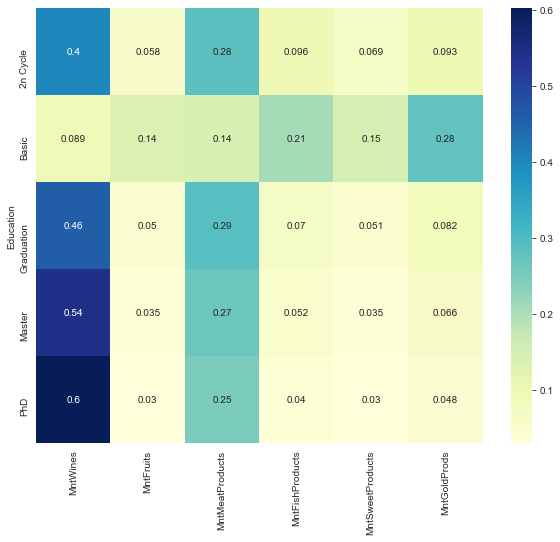

In [222]:
# plot showing the percentage of total spending of different products by a group of customers having the same education level

amount_per_category(df, 'Education')

**Observations:**
- Customers with Ph.D. spend ~60% of their total spending on wines.
- Customers with Graduation and Master's spent ~45-50% of their total spending on wines.
- Customers with Graduation and Master's spend ~27-29% of their total spending on meat.
- Customers with Ph.D. spend ~25% of their total spending on meat.
- Customers having education level Master or Ph.D. spend ~80% on meat and wines.
- Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.
- Based on spending types, could customers with a basic education represent a younger age group.

### **Question 7: Write the code and your observations on percentage amount spent on different products for each category of the mentioned categorical variables.** - 7 Marks

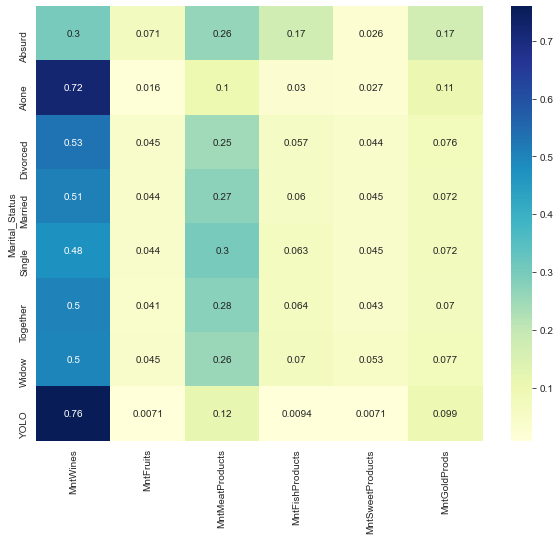

In [223]:
#call the function amount_per_category for Marital_Status with dataframe df_rest
amount_per_category(df_rest, 'Marital_Status')

**Observations:**
- YOLO customers spent 75% of their spending on wine, followed by 'Alone' customers who spent 72% of their budget on wine. 
- Divorced and Married customers saw a similar ~50% spending budget for wine. 
- Together and Widow customers spent exactly 50% of their spending on wine. 
- The Absurd customer group does not have data that represents a similar pattern as with the other customer groups. The Absurd customer category may be nonessential. 
- All customers saw a small average spent on fruit: however, this representation is difficult to evaluate because each item of fruit costs significantly less each item of wine or of meat (100 apples could still cost significantly less than 1 bottle of wine). 

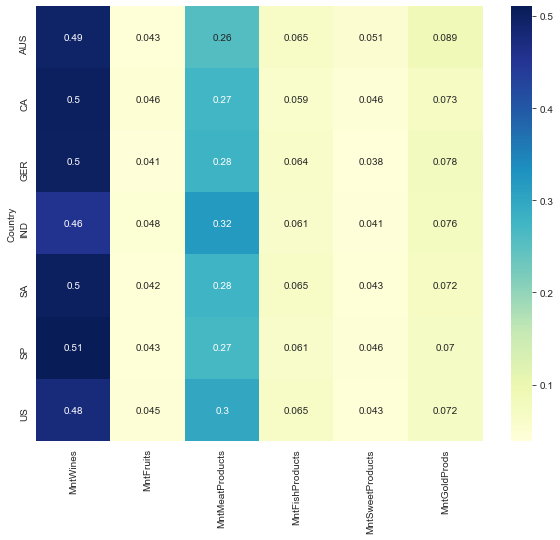

In [224]:
#call the function amount_per_category for Country with dataframe df_not_mexico
amount_per_category(df_not_mexico, 'Country')

**Observations:
- All countries spent near to ~50% on wine. 
- All countries also spent near to ~30% on meat. 
- The lowest category for spending among all countries was fruit, followed by sweets. 
- Gold products represented the third-highest spending category after wine and meat. 

### Check different channel performances 

Let's calculate the percentage of purchases for all the channels.

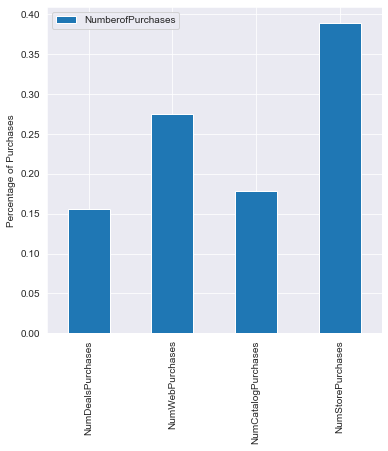

In [225]:
# list of cols for channels
channel_cols = [col for col in df.columns if 'Purchases' in col] 

# make dataframe of columns having purchase and taking sum of them.
channels = pd.DataFrame(df[channel_cols].sum()/df.Total_Purchase.sum(), columns=['NumberofPurchases'])

# bar plot
channels.plot(kind='bar', figsize=(6,6))
plt.ylabel("Percentage of Purchases")
plt.show()

**Observations**:

- We can see that most purchases are from the stores followed by web purchases.
- Number of deal purchases and catalog purchases is low, but higher for catalog purchases than deal purchases. 
- For grocery purchases, it is not unusual to see that customers preferred buying in-store over the website. If this data was for i.e. clothing, there might exist a different outlook. 

### **Question 8: Write your observations on percentage purchases from different channels for different categories of the income_cat column.** - 4 Marks

Let's check how number of purchases via different channels varies for different income bins.

In [226]:
# binning the income column
df['income_cat']=pd.qcut(df.Income, q=[0, 0.25, 0.50, 0.75, 1], labels=['low', 'medium', 'high', 'very_high'])

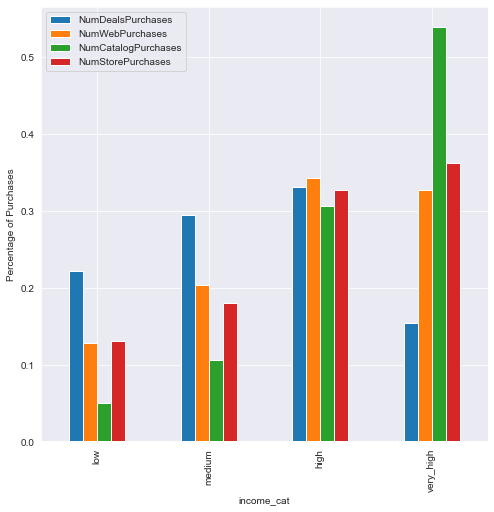

In [227]:
group=df.groupby('income_cat').sum()[channel_cols]
(group/group.sum()).plot(kind='bar', figsize=(8,8))
plt.ylabel("Percentage of Purchases")
plt.show()

**Observations**:

- High-income customers spent over ~50% of purchases through a catalog. 
- Number of deals purchases steadily increases from low-income customers to high-income customers, but abruptly drops for high-income customers. 
- Number of web purchases also steadily increases from low-income customers to high-income customers, but somewhat drops for high-income customers. 
- In-store purchases are the event for all income earning customers. 
- Low-income customers spent the least through catalog purchases; while, high-income customers spent the most through catalog purchases. 
- High-income customers had the evenest spending pattern across deals, the store website, catalogs, and in-store purchases. 
- Middle-income customers did not make many catalog purchases. 

### We can also visualize the correlation by purchases from different channels and income of the customer.

### **Question 9: Find the correlation matrix for the columns mentioned below and visualize the same using heatmap.** - 3 Marks

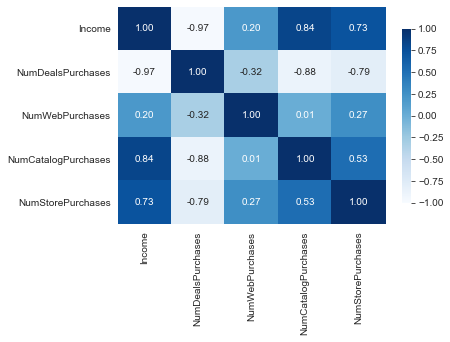

In [228]:
corr_collumns=df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

# get correlation
corr_matrix = corr_collumns.corr()

# plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})


# display the plot 
plt.show()

**Observations**:
- The higher the customer's income, the less they purchased through deals, but the more they purchased through a catalog.
- There is a positive correlation between Income and in-store purchases. 
- There is a strong negative correlation between Deals purchases and Catalog purchases. 
- There is also a strong, negative correlation between in-store purchases and deals purchases. It could indicate that customers who shopped in-store, did not purchase products with deals. 

As we know from our analysis we have done so far that customers with income, number of children, and amount spending on wines are the important factors.  Let's try to come up with new customer profile on the basis of these 3 attributes and check what would be the acceptance rate for that customer profile.

In [229]:
# customers with income greater than 52K, no kids
# and spending more on wine products than the
# overall average spent on wine products
df3=df[df.Income>52000] 
df4=df3[df3.MntWines>df3.MntWines.mean()] 
new_profile=df4[df4.NumberofChildren==0]
new_profile

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp6,Complain,Country,Education_Mod,Marital_Status_Mod,Total_Spending,Total_Purchase,NumberofChildren,TotalCampaignsAcc,income_cat
6,4073,1954,2n Cycle,Married,63564.0,0,0,0,769,80,...,0,0,GER,Master,Partnership,1215,28,0,2,high
35,7962,1987,PhD,Single,95169.0,0,0,1,1285,21,...,0,0,SP,PhD,NonPartnership,1901,12,0,3,very_high
38,3725,1961,PhD,Single,84865.0,0,0,1,1248,16,...,1,0,SP,PhD,NonPartnership,1688,16,0,5,very_high
42,1524,1983,2n Cycle,Single,81698.0,0,0,1,709,45,...,0,0,SP,Master,NonPartnership,1104,16,0,2,very_high
70,1772,1975,PhD,Married,79174.0,0,0,2,1074,37,...,0,0,CA,PhD,Partnership,2043,19,0,3,very_high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,9757,1972,Graduation,Together,84906.0,0,0,98,997,15,...,1,0,SP,Graduation,Partnership,1631,24,0,3,very_high
2208,2088,1972,Graduation,Together,84906.0,0,0,98,997,15,...,1,0,GER,Graduation,Partnership,1631,24,0,3,very_high
2212,3979,1983,PhD,Divorced,90687.0,0,0,98,982,17,...,0,0,SP,PhD,NonPartnership,1779,17,0,2,very_high
2215,9645,1968,Graduation,Married,64590.0,0,0,98,920,138,...,0,0,SP,Graduation,Partnership,1338,24,0,0,high


**Observations:
- A label discrepancy exists for total acceptance rates that equal 0 and are considered 'high' for 'income_cat'
- There are relatively the same number of total campaign acceptances for both customers in a Partnership and customers in a NonPartnership. 

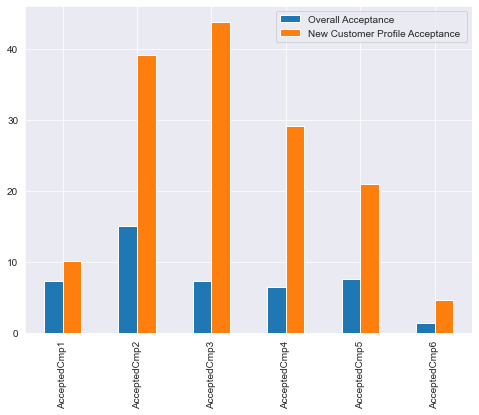

In [230]:
# calculate success rate of each campaign for both segments 
success_campaign3=pd.DataFrame(success_campaign, columns=['Overall Acceptance'])

success_campaign4=pd.DataFrame((new_profile[Camp_cols].sum()/new_profile.shape[0])*100, columns=['New Customer Profile Acceptance '])

# plot
pd.concat([success_campaign3, success_campaign4], axis=1).plot(kind='bar', figsize=(8,6))
plt.title("")
plt.ylabel("")
plt.show()

**Observations:**
- Orange bars in the plot indicate that acceptance rates would have been high for new a customer profile (i.e. income greater than the mean income, no kid at home, the amount spent on wines is greater than the mean amount spent on wines)
- The new (higher income) customer, accepted campaign 2 and campaign 3 the most and campaign 6 the least.
- Overall, average customer acceptance rates were low for campaign 1, campaign 2, campaign 4. 

### **Question 10: Based on your analysis, write the conclusions and recommendations for the CMO to help make the next marketing campaign strategy.** - 10 Marks

## Conclusion and Recommendations

#Write your conclusions here

There are two types of customers: a high-income earning customer and everyone else. All customers had a positive experience with Campaign 1, Campaign 2, and Campaign 3. However, only high-income customers experienced Campaigns 4, and 5 positively. Campaign 6 was ineffective and looking at geographics data for each customer was equally ineffective. Customers with teens in the home experienced a negative correlation with campaign acceptance; and although this is a noteworthy data point, it is not emphatic enough to include in a campaign strategy. 


#Write your recommendations here

Split the customers into two groups: a 'high-income customer' and a  'not high-income customer'. Target both customer groups with Campaign 1, Campaign 2, Campaign 3. Emphasize and iterate on Campaign 2 for both groups because it was the most significant and had the highest reception rate. Specifically, target high-income customers with Campaign 4 and Campaign 5 (exclude the 'not high-income customers' from these campaigns). Do not apply Campaign 4 and Campaign 5 to the 'non-high-income customer', because the data illustrates a significant negative correlation with the campaign acceptance rate. 

Furthermore, in selecting products for the campaigns, emphasize 'meat' and 'wine' products for the 'high-income customer' group, as this had the highest positive correlation for campaign acceptance. Targeting specific geographic areas is not effective. The data shows that the campaigns were average across all geographic locations. 

Drop campaign 6 entirely; it was not engaging and did not result in acceptance.

